Load the iris data set 

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Have a look at the keys in the dataset
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


Use the value DESCR to get a short description of the dataset 

In [2]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


We can now view the the target_value for the iris dataset

In [3]:
print("Target names: {}".format(iris_dataset['target_names']))


Target names: ['setosa' 'versicolor' 'virginica']


Have a look to the features inside the dataset

In [4]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the target and data fields. data contains the numeric
measurements of sepal length, sepal width, petal length, and petal width in a NumPy
array:

In [5]:
print('Type of Data: {}'.format(type(iris_dataset['data'])))

Type of Data: <class 'numpy.ndarray'>


We can find the shape  of the data

In [6]:
print("Shape of Data: {}".format(iris_dataset['data'].shape))

Shape of Data: (150, 4)


Take a look at the data

In [7]:
print("First Five columns of the data: \n{}".format(iris_dataset['data'][:5]))

First Five columns of the data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Training and Testing Data 
Import ``Scikit-learn`` library to split train and test data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

The output of the ``train_test_split`` function is ``X_train``, ``X_test``, ``y_train``, and
``y_test``, which are all NumPy arrays. X_train contains 75% of the rows of the dataset,
and X_test contains the remaining 25%:

We can now view the shape of both *train* and *test* data

In [20]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


## Visualize our data 

C:\Users\willy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  # Remove the CWD from sys.path while we load stuff.


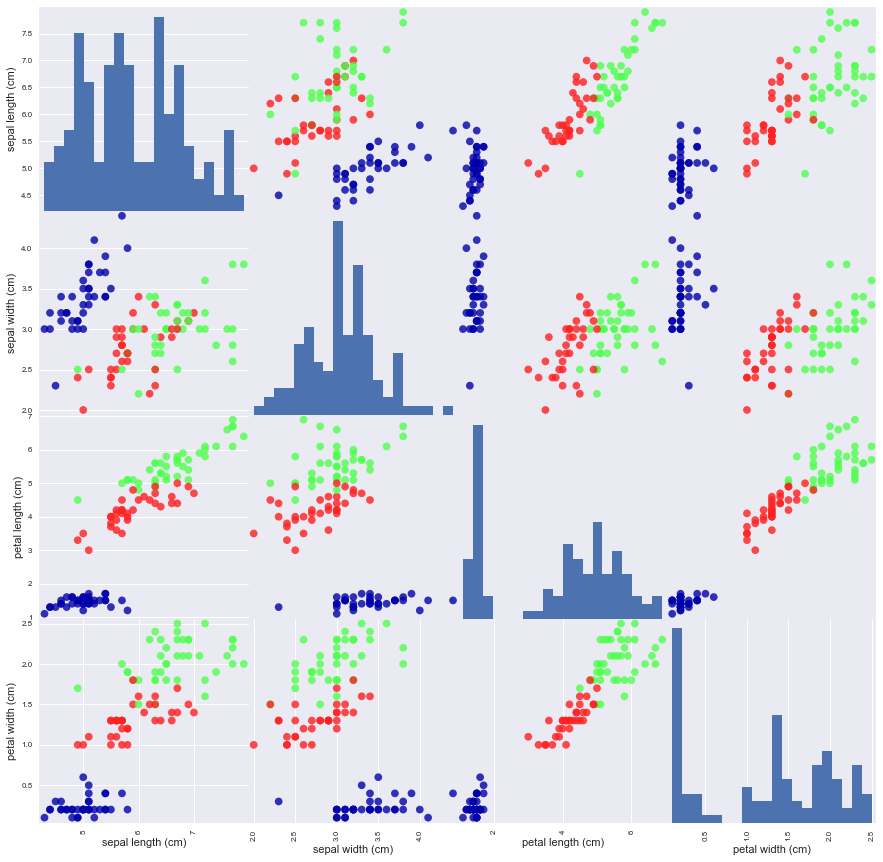

In [23]:
import pandas as pd
%matplotlib inline
import mglearn

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

## Building a Model
 To  built a model,import classfier classes from Scikit learn 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Then fit data into your model

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Making predition 
First make an array to hold your arguments

In [29]:
import numpy as np
X_new = np.array([[2, 4.0, 4, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


We can now call our ``predict`` method to make the prediction which will tell us which species our array lies on

In [30]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [1]
Predicted target name: ['versicolor']


## Evaluate the model 
We want to find out the accuracy of our model when it comes  to predicting

In [31]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [32]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [33]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


This means the model made prediction for 97% right